# Ironhack Data Analytics Bootcamp
## Project: Visualizing Real World Data

<p> <strong>Selected Data:</strong> Airbnb in Mexico City <br>
<strong>By: </strong>Nayely Saldivar</p>

### - Data Cleaning and Manipulation

In [1]:
# Importamos las paqueterías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [2]:
# Cargamos las bases en crudo que obtuvimos de insideairbnb.com
registros_20=pd.read_csv('.\data\Actual\listings.csv')
registros_19=pd.read_csv('.\data\Antes\listings.csv')

calendario_20=pd.read_csv('.\data\Actual\calendar.csv')
calendario_19=pd.read_csv('.\data\Antes\calendar.csv')

C:\Users\sarun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Incluye las llaves para unirlo con el calendario, el host, descripciones de los lugares y los reviews
registros_20.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20201026064150,2020-10-27,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/201492/ef4b2e...,153786,https://www.airbnb.com/users/show/153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20201026064150,2020-10-26,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,...,9.0,10.0,9.0,NaN,f,10,2,1,0,0.44
2,61792,https://www.airbnb.com/rooms/61792,20201026064150,2020-10-26,Spacious Clean Quiet room (own bath) in la Con...,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/45f23965-0194...,299558,https://www.airbnb.com/users/show/299558,...,10.0,10.0,10.0,NaN,f,2,0,2,0,1.43


In [4]:
# Inspeccionamos si las bases son homogéneas para crear el pipeline
registros_19.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,22787,https://www.airbnb.com/rooms/22787,20191020152049,2019-10-20,"Sunny suite w/ queen size bed, inside boutique...",This suite inside El Patio 77 - an eco-friendl...,El Patio 77 is the first eco-friendly bed and ...,This suite inside El Patio 77 - an eco-friendl...,none,Up-and-coming San Rafael neighborhood combines...,...,t,f,strict_14_with_grace_period,f,f,8,0,8,0,0.50
1,35797,https://www.airbnb.com/rooms/35797,20191020152049,2019-10-21,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",please go to (URL HIDDEN) and see the place a...,"Dentro de Villa un estudio de arte con futon, ...",none,"Centro comercial Santa Fe, parque interlomas y...",...,f,f,flexible,f,f,2,1,1,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20191020152049,2019-10-20,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,Stay with us at this bed & breakfast named CON...,A new concept of hosting in mexico through a b...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,10,1,1,0,0.42


In [5]:
print('Columnas 2020:',len(registros_20.columns))
print('Columnas 2019:',len(registros_19.columns))

Columnas 2020: 74
Columnas 2019: 106


In [6]:
# Hacemos este cambio para homogenizar la base
registros_20['bathrooms']=registros_20['bathrooms_text'].str.replace(' private bath','').str.replace(' shared bath','').str.replace(' bath','').str.replace('s','')

In [7]:
# Después de analizar la base, estas son las colunmas que deseo conservar 
columnas_base= ['id', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url',
'host_name', 'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 
'accommodates','bathrooms','bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 
'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'reviews_per_month']

len(columnas_base)

24

In [8]:
# Hacemos el slicing de los DF según los datos que nos interesan
registros_20=registros_20[columnas_base]
registros_19=registros_19[columnas_base]

In [9]:
# Revisamos si hay columnas que no nos aportan información
columnas_20=registros_20.isnull().sum()[registros_20.isnull().sum()>0]
columnas_20

name                        5
description              1223
neighborhood_overview    5983
host_name                   2
host_is_superhost           2
bathrooms                  21
bedrooms                  750
beds                      298
review_scores_rating     5241
review_scores_value      5268
reviews_per_month        5046
dtype: int64

In [10]:
columnas_19=registros_19.isnull().sum()[registros_19.isnull().sum()>0]
columnas_19

name                       10
description               944
neighborhood_overview    5929
host_name                  13
host_is_superhost          13
bathrooms                   6
bedrooms                   20
beds                       28
review_scores_rating     5170
review_scores_value      5183
reviews_per_month        4905
dtype: int64

In [11]:
# Los valores nulos de los reviews parecen estar de manera uniforme, vamos a ver si sí podemos eliminarlos
null_rew = registros_20[registros_20['review_scores_value'].isnull() == True]
null_rew[['review_scores_value','review_scores_rating','reviews_per_month']].isnull().sum()

review_scores_value     5268
review_scores_rating    5241
reviews_per_month       5046
dtype: int64

In [12]:
# Dropeamos los registros que no nos proporcionarán info sobre las calificaciones
print('--- Base 2020 ---')
print('Rows antes de limpieza:',len(registros_20))
registros_20=registros_20.drop(null_rew.index,axis=0)
print('Rows después de limpieza:',len(registros_20))

print('--- Base 2019 ---')
print('Rows antes de limpieza:',len(registros_19))
registros_19=registros_19.drop(null_rew.index,axis=0)
print('Rows después de limpieza:',len(registros_19))

--- Base 2020 ---
Rows antes de limpieza: 19180
Rows después de limpieza: 13912
--- Base 2019 ---
Rows antes de limpieza: 20568
Rows después de limpieza: 15300


In [13]:
# Formateamos el precio para poder trabajar con el
registros_20['price']=registros_20['price'].str.replace('$','').str.replace(',','').astype('float64')
registros_19['price']=registros_19['price'].str.replace('$','').str.replace(',','').astype('float64')

In [14]:
# Añadimos un identificador de año y unimos las bases
registros_20['year']='2020'
registros_19['year']='2019'
registros=pd.concat([registros_19,registros_20],axis=0)

In [15]:
# Nos desglosa las reservaciones ya hechas, si aún hay disponibilidad de fechas, el precio, la estadía mínima y máxima por fecha.
calendario_20.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35797,2020-10-27,f,"$4,194.00","$4,194.00",1.0,7.0
1,35797,2020-10-28,f,"$4,194.00","$4,194.00",1.0,7.0
2,35797,2020-10-29,t,"$4,194.00","$4,194.00",1.0,7.0


In [16]:
calendario_19.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1066945,2019-10-20,t,$950.00,$950.00,2.0,365.0
1,22787,2019-10-20,f,"$2,904.00","$2,904.00",1.0,365.0
2,22787,2019-10-21,f,"$2,904.00","$2,904.00",1.0,365.0


In [17]:
# Eliminamos las columnas que tenemos por default
calendario_20=calendario_20[['listing_id','date','available','price','adjusted_price']]
calendario_19=calendario_19[['listing_id','date','available','price','adjusted_price']]

In [18]:
# Examinamos los tipos de datos y limpiamos lo necesario
calendario_20['price']=calendario_20['price'].str.replace('$','').str.replace(',','').astype('float64')
calendario_20['adjusted_price']=calendario_20['adjusted_price'].str.replace('$','').str.replace(',','').astype('float64')

calendario_19['price']=calendario_19['price'].str.replace('$','').str.replace(',','').astype('float64')
calendario_19['adjusted_price']=calendario_19['adjusted_price'].str.replace('$','').str.replace(',','').astype('float64')

In [19]:
# Añadimos un identificador de año y unimos las bases
calendario_20['year']='2020'
calendario_19['year']='2019'
calendario=pd.concat([calendario_19,calendario_20],axis=0)

### - Exporting Cleaning Data

In [20]:
# Guardamos las bases limpias para pasar a la visualización en Tablue o BI
registros.to_csv('base_registros.csv')
calendario.to_csv('calendario_f.csv')

### - Algunos Data Insigths 

In [21]:
# Buscando características entre los alojamientos con mejor puntuación hacemos un extracto de los que tienen puntaje perfecto y suficientes reseñas
print(registros['number_of_reviews'].mean())
top_perfect_rating=registros[(registros['review_scores_rating']==100 )&(registros['number_of_reviews']>=registros['number_of_reviews'].mean())]
top_perfect_rating.head()

27.66969053813501


,id,name,description,neighborhood_overview,host_id,host_url,host_name,host_is_superhost,neighbourhood_cleansed,latitude,...,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month,year
3,58955,Entire beautiful duplex in la Roma,"This beautiful apartment is centrally located,...",La Roma Norte is a beautiful bohemian and arts...,282620,https://www.airbnb.com/users/show/282620,Nat,f,Cuauhtémoc,19.42292,...,1.0,"{Internet,Wifi,""Wheelchair accessible"",Kitchen...",1624.0,3,60,39,100.0,10.0,0.41,2019
158,980600,HABITACION CON BAÑO IND AEROPUERTO,"Cerca del aeropuerto T1 y T2 , habitación con ...",Me gusta que es tranquilo y no ha perdido la c...,4157866,https://www.airbnb.com/users/show/4157866,Fabeli,t,Venustiano Carranza,19.41583,...,1.0,"{TV,""Cable TV"",Wifi,""Pets live on this propert...",382.0,1,300,43,100.0,10.0,0.62,2019
223,1462549,Charming loft near Reforma Ave.,Enjoy the city by feet or bike. Visit places l...,> La colonia Anzures tiene la gran virtud de e...,7838265,https://www.airbnb.com/users/show/7838265,Ernesto,t,Miguel Hidalgo,19.42802,...,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",1490.0,7,1124,44,100.0,10.0,0.59,2019
341,2521698,Art Deco in Condesa King,"The house, built in 1936 and recently renovate...","Bike rides, parks, more than 150 gastronomic o...",12910391,https://www.airbnb.com/users/show/12910391,Alejandro,t,Cuauhtémoc,19.41208,...,0.0,"{TV,Internet,Wifi,Kitchen,""Free street parking...",1700.0,2,90,66,100.0,10.0,1.19,2019
440,3293072,Amazing Loft @ Iconic Building R27,"Live this cosmopolitan, stylish, comfortable a...",The Tabacalera is one of the most traditional ...,16636749,https://www.airbnb.com/users/show/16636749,Ximena,t,Cuauhtémoc,19.43547,...,1.0,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",1911.0,3,180,94,100.0,10.0,1.60,2019


In [22]:
# Creamos algunos KPI's para explorar mejor la data
top_perfect_rating['price/bedroom']=round(top_perfect_rating['price']/top_perfect_rating['bedrooms'],1)
top_perfect_rating['price/bed']=round(top_perfect_rating['price']/top_perfect_rating['beds'],1)
top_perfect_rating['price/bedroom']=top_perfect_rating['price/bedroom'].replace(np.inf,0)
top_perfect_rating['price/bed']=top_perfect_rating['price/bed'].replace(np.inf,0)

top_perfect_rating['price range']=round(top_perfect_rating['price']/top_perfect_rating['bedrooms'],1)

<ipython-input-22-703e1e7d5f88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_perfect_rating['price/bedroom']=round(top_perfect_rating['price']/top_perfect_rating['bedrooms'],1)
<ipython-input-22-703e1e7d5f88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_perfect_rating['price/bed']=round(top_perfect_rating['price']/top_perfect_rating['beds'],1)
<ipython-input-22-703e1e7d5f88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [23]:
# Obtenemos algunas estadísticas
price_min=top_perfect_rating['price'].describe()['min']
price_25=top_perfect_rating['price'].describe()['25%']
price_50=top_perfect_rating['price'].describe()['50%']
price_75=top_perfect_rating['price'].describe()['75%']

In [24]:
# Comparamos los KPI's
top_perfect_rating.pivot_table(index=['neighbourhood_cleansed'],values=['price','price/bedroom','price/bed'],aggfunc={'price':'mean','price/bedroom':'mean','price/bed':'mean'})

,price,price/bed,price/bedroom
neighbourhood_cleansed,,,
Azcapotzalco,679.600000,293.220000,422.000000
Benito Juárez,652.826087,453.059420,517.926087
Coyoacán,1014.895833,666.897917,802.668750
Cuajimalpa de Morelos,1493.333333,744.577778,912.000000
Cuauhtémoc,1649.346591,827.630682,922.793143
Gustavo A. Madero,504.666667,347.333333,454.750000
Iztacalco,550.000000,183.300000,183.300000
Iztapalapa,360.000000,262.500000,360.000000
La Magdalena Contreras,555.750000,342.875000,555.750000


In [25]:
# Estadistica descriptiva
registros_19['price'].describe()

count     15300.000000
mean       1142.631503
std        3598.768050
min           0.000000
25%         401.000000
50%         707.000000
75%        1242.000000
max      350005.000000
Name: price, dtype: float64

In [26]:
# Estadistica descriptiva
registros_20['price'].describe()

count     13912.000000
mean       1093.312320
std        3439.857004
min         150.000000
25%         400.000000
50%         689.000000
75%        1146.000000
max      208750.000000
Name: price, dtype: float64

In [27]:
# Polanco, Chapultepec, Centrico
registros[registros['neighbourhood_cleansed']=='Miguel Hidalgo'][['description','neighborhood_overview']][10:]

,description,neighborhood_overview
71,Como tu propia casa. Muy cómodo y con servicio...,Esta zona está conectada por el poniente de l...
94,Habitacion con 2 camas individuales ideal para...,"very well located, just 5 blocks from the metr..."
98,Big ample high ceiling three bedroom well deco...,San Miguel Chapultepec is one of the nicest ne...
99,"I am a translator and work in the flat, so lan...",NaN
100,"I am a translator and work in the flat, so lan...","It has museums, restaurants, bars, pub, malls,..."
...,...,...
18940,"""¡Hola! Te invitamos a que te hospedes con nos...",El loft se encuentra en uno de los barrios más...
19000,Hermoso departamento ubicado en el corazón de ...,"El ambiente de condominio es muy familiar, el ..."
19017,Welcome to my cozy and warm place. Professiona...,NaN
19063,Habitación privada con cama matrimonial y clos...,NaN


In [28]:
# Colonia Condesa, La roma
registros[registros['neighbourhood_cleansed']=='Cuauhtémoc'][['description','neighborhood_overview']][:10]

,description,neighborhood_overview
2,A new concept of hosting in mexico through a b...,NaN
3,"This beautiful apartment is centrally located,...",La Roma Norte is a beautiful bohemian and arts...
7,"The most requested room in El Patio 77, an eco...",Up-and-coming San Rafael neighborhood combines...
12,"Casa Comtesse is an antique mansion, that has ...",Situated in the heart of the trendy and centra...
13,"This huge ""Mad Men"" Condo is located on a priv...","Two blocks from Paseo de la Reforma, between A..."
14,This is a lovely two bedroom apartment with a...,Condesa is the place to be in Mexico City. Oft...
15,HE NEIGHBORHOOD Condesa is the place to be in ...,Condesa is the place to be in Mexico City. Oft...
16,This is a lovely one bedroom - one bathroom ap...,NaN
17,****** CHECK OUT OUR OTHER APARTMENT IN THE SA...,The apartment is across the street from a supe...
18,An 807 square feet apartment with a 322 square...,NaN


In [29]:
# Santa fé, San Ángel, Guadalupe Inn, conexion con Insurgentes etc
registros[registros['neighbourhood_cleansed']=='Álvaro Obregón'][['description','neighborhood_overview']][:20]

,description,neighborhood_overview
75,"Lugares de interés: Sta. Fe, restaurantes y co...",NaN
96,Newly renovated charming studio in the colonia...,San Ángel is a colonia or neighborhood of Mexi...
97,Historical house in the heart of colonial neig...,"San Angel is a quiet zone, an oasis in this b..."
203,Spacious room. It has a complete private bathr...,We live in an upper middle class neighborhood ...
234,"Beautiful, spacious and calm independent Suite...",San Ángel is a XVI century village nestled in ...
247,"Beautiful independent Suite on ground floor, w...",San Ángel is a XVI century village nestled in ...
248,"Small, very practical and beautiful independen...",San Ángel is a XVI century village nestled in ...
264,"Small, very practical and beautiful independen...",San Ángel is a XVI century village nestled in ...
307,Enjoy the suite with independent entrance. Thi...,"Full of lava rock, this is a neighborhood deve..."
430,"MONTHLY RENT $6,500 MXN¡¡ :)) send me a text a...","Very quite and peaceful, leave the Stress out ..."


### - Visualizing Data

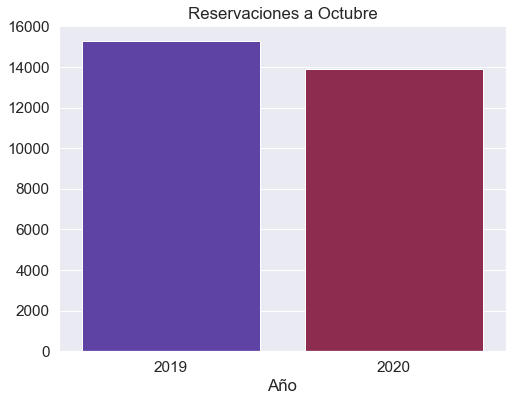

In [30]:
# Revisamos la variación de reservaciones de un año a otro

reservaciones=registros.groupby('year')['id'].nunique().reset_index()

sns.set(rc={'figure.figsize':(8,6)},font_scale=1.4,style="darkgrid")
ax = sns.barplot(x='year',y='id',data=reservaciones,palette='twilight',saturation=1)
plt.ylabel('')
plt.xlabel('Año')
plt.title('Reservaciones a Octubre');

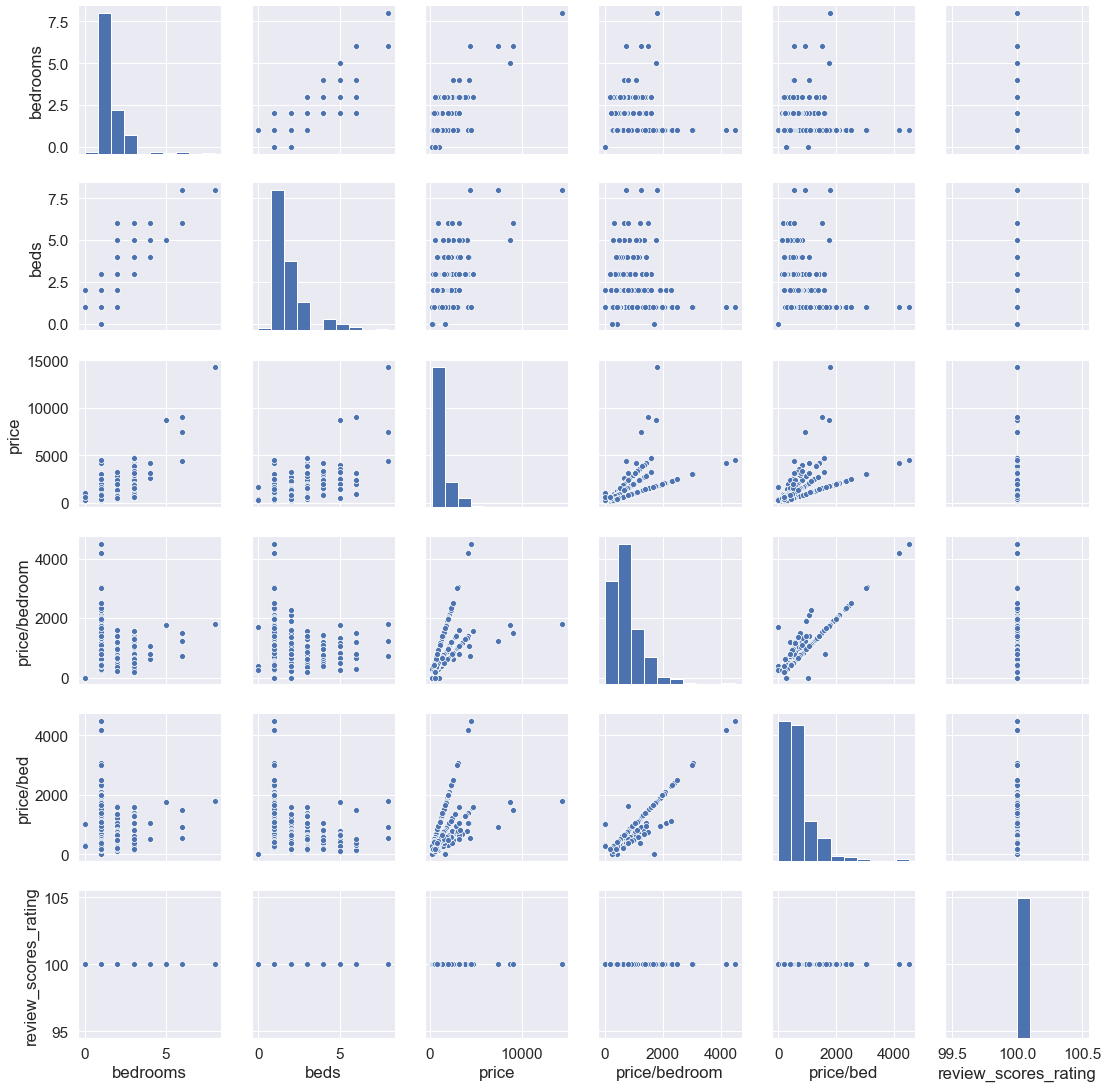

In [31]:
# Buscando correlación entre las variables
g = sns.pairplot(top_perfect_rating, vars=['bedrooms', 'beds', 'price','price/bedroom','price/bed','review_scores_rating'])

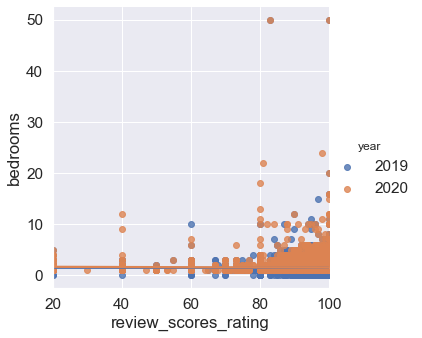

In [32]:
# Validamos si existe alguna relación entre el número de camas y los reviews
sns.lmplot(x="review_scores_rating", y="bedrooms", hue="year", data=registros);

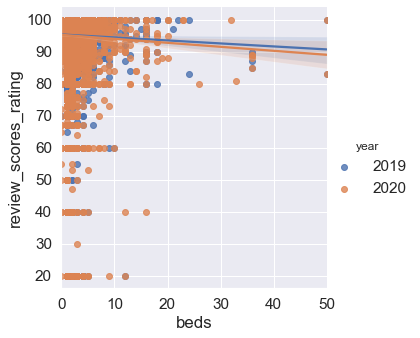

In [33]:
# Validamos si existe alguna relación entre el número de camas y los reviews
sns.lmplot(x="beds", y="review_scores_rating", hue="year", data=registros);

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


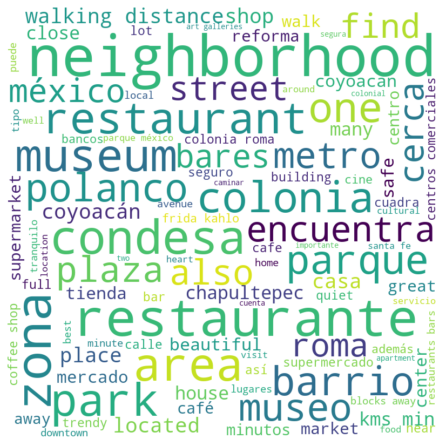

In [34]:
# Creamos el wordcloud
import nltk 
nltk.download('stopwords')
from nltk import tokenize
from nltk.corpus import stopwords
# Python program to generate WordCloud 

stopwords_sp = set(stopwords.words('spanish'))
stopwords_en = set(stopwords.words('english'))

stopwords= stopwords_sp | stopwords_en 
stopwords.update(['br','ciudad','city','mexico','etc','nan'])

# Reads 'Youtube04-Eminem.csv' file  
df = top_perfect_rating['neighborhood_overview']
  
comment_words = '' 
# stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                max_words=100).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 